In [3]:
import os
import pandas as pd
import sqlite3 as sql

In [19]:
LABELS = ['benign', 'malicious']
PDFMAL_DIR = '/mnt/z/g4_mic/raw/pdfmalware'
DATASET_DIR = '/mnt/d/data/dsci591_project/g4_mic_local/preprocessed/images_256x256'
SOREL_META_DB_PATH = '/mnt/d/data/sorel20m/meta.db'

# PDFs

In [51]:
df_pdfmal.loc[lambda x: x.file.str.contains('about')]

,path,is_benign,file,base_file,kind
2197,/mnt/z/g4_mic/raw/pdfmalware/benign/about_our_...,1,about_our_office.pdf,about_our_office,data


In [24]:
df_pdfmal = pd.DataFrame.from_records([
    {
        'path': (file_path := os.path.join(PDFMAL_DIR, l, file)),
        'is_benign': 1 if l == 'benign' else 0,
        'file': file,
        'base_file': os.path.splitext(file)[0],
        'kind': 'data',
    }
    for l in LABELS
    for file in os.listdir(os.path.join(PDFMAL_DIR, l))
])
df_pdfmal

,path,is_benign,file,base_file,kind
0,/mnt/z/g4_mic/raw/pdfmalware/benign/f8847.pdf,1,f8847.pdf,f8847,data
1,/mnt/z/g4_mic/raw/pdfmalware/benign/idrs-pia.pdf,1,idrs-pia.pdf,idrs-pia,data
2,/mnt/z/g4_mic/raw/pdfmalware/benign/babsncl.pdf,1,babsncl.pdf,babsncl,data
3,/mnt/z/g4_mic/raw/pdfmalware/benign/carmalan.pdf,1,carmalan.pdf,carmalan,data
4,/mnt/z/g4_mic/raw/pdfmalware/benign/betinter.pdf,1,betinter.pdf,betinter,data
...,...,...,...,...,...
30996,/mnt/z/g4_mic/raw/pdfmalware/malicious/27e1222...,0,27e122223ab29c7eadeb7ff80ed68e152554a6220c3765...,27e122223ab29c7eadeb7ff80ed68e152554a6220c3765...,data
30997,/mnt/z/g4_mic/raw/pdfmalware/malicious/bfe6144...,0,bfe6144494872e45fdcafd4985e769f8cec8fd10,bfe6144494872e45fdcafd4985e769f8cec8fd10,data
30998,/mnt/z/g4_mic/raw/pdfmalware/malicious/7c2188d...,0,7c2188d33f946855dc3ff680a33953b830443001,7c2188d33f946855dc3ff680a33953b830443001,data
30999,/mnt/z/g4_mic/raw/pdfmalware/malicious/261675c...,0,261675c40372b342e958635b7ee881f4d8c93c99d68d93...,261675c40372b342e958635b7ee881f4d8c93c99d68d93...,data


# 256x256 Registry

In [26]:
dataset_files = []

for l in LABELS:
    registry_path = os.path.join(DATASET_DIR, f'{l}.txt')
    with open(registry_path, 'r') as fin:
        for line in fin:
            file = line.strip()
            dataset_files.append({
                'path': (path := os.path.join(DATASET_DIR, l, file)),
                'is_benign': 1 if l == 'benign' else 0,
                'file': file,
                'base_file': os.path.splitext(file)[0],
            })

df_dataset = pd.DataFrame.from_records(dataset_files)
df_dataset

,path,is_benign,file,base_file
0,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,1,00-about-docs.npy,00-about-docs
1,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,1,00-entry-directory.npy,00-entry-directory
2,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,1,00FAQ.npy,00FAQ
3,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,1,00LSOF-L.npy,00LSOF-L
4,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,1,00-mesa-defaults.npy,00-mesa-defaults
...,...,...,...,...
238621,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,0,fff56e36b16c9eb00791dc7364031d2ba1c7028e0d7f1f...,fff56e36b16c9eb00791dc7364031d2ba1c7028e0d7f1f...
238622,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,0,fffc9d34a2b4b8c0e38f078edbad1075547c5bea1dfe79...,fffc9d34a2b4b8c0e38f078edbad1075547c5bea1dfe79...
238623,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,0,PDF-XDP_17290367B3FC3A43525D5BC18AF03FFD_weekl...,PDF-XDP_17290367B3FC3A43525D5BC18AF03FFD_weekl...
238624,/mnt/d/data/dsci591_project/g4_mic_local/prepr...,0,PDF-XDP_464493AC7E730BA2A8E0F5FB2995DB20_Tony ...,PDF-XDP_464493AC7E730BA2A8E0F5FB2995DB20_Tony ...


# Sorel20M meta.db

In [11]:
connection = sql.connect(SOREL_META_DB_PATH)
df_sorel = pd.read_sql_query('SELECT * FROM meta', connection)
df_sorel = df_sorel.assign(kind='binary')
df_sorel

,sha256,is_malware,rl_fs_t,rl_ls_const_positives,adware,flooder,ransomware,dropper,spyware,packed,crypto_miner,file_infector,installer,worm,downloader
0,de66443f0fc555753e64a34c99d9667abcf59dacca9198...,0,1.483229e+09,1,0,0,0,0,0,0,0,0,0,0,0
1,047316c8118e6e4d088c4aaebab34a031e62ecc42ecefc...,1,1.483229e+09,5,0,0,0,0,0,0,0,0,0,0,0
2,d6953e9740b0b396650bfab9983c557a443bcdbad2d67a...,0,1.483229e+09,1,0,0,0,0,0,0,0,0,0,0,0
3,7e4ee821a55bfe16596f2e99d4163fa77d455a4961407b...,0,1.483229e+09,1,0,0,0,0,0,0,0,0,0,0,0
4,997990bb784a9689e4293d788964c6a76ea7a1ff369a61...,1,1.483229e+09,6,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19724992,eb2d3b0a31f40d1851802f8163a0ea316c4115b699f650...,0,1.554955e+09,0,0,0,0,0,0,0,0,0,0,0,0
19724993,155f40ceb7f3ff530c573566b00b1333e1a268f066bef7...,0,1.554955e+09,1,0,0,0,0,0,0,0,0,0,0,0
19724994,0f234b384fa159a9309517649e7890864f5fb27f6265e8...,0,1.554955e+09,1,0,0,0,0,0,0,0,0,0,0,0
19724995,9bcff1ab2183486646c14b9d554c1110fb5cd3d866e5c5...,0,1.554955e+09,0,0,0,0,0,0,0,0,0,0,0,0


# Registry Creation

In [125]:
df_registry = (pd.merge(df_dataset, df_pdfmal.loc[:, ['base_file', 'kind']], on='base_file', how='left')
 .merge(df_sorel.loc[:, ['sha256', 'kind', 'adware', 'flooder', 'ransomware', 'dropper', 'spyware', 'packed', 'crypto_miner', 'file_infector', 'installer', 'worm', 'downloader']], left_on='base_file', right_on='sha256', how='left')
 .assign(kind = lambda df_x: df_x.kind_x.combine_first(df_x.kind_y))
 .assign(pdfmal = lambda df_x: ((df_x.kind == 'data') & (df_x.is_benign == 0)).astype(int))
 .drop(columns=['kind_x', 'kind_y', 'sha256'])
 .fillna(0)
)

# unaccounted for benign samples are self-sourced binaries
df_registry.loc[df_registry['kind'] == 0, 'kind'] = 'binary'

# there are some values > 1
sorel_classes = ['adware', 'flooder', 'ransomware', 'dropper', 'spyware', 'packed', 'crypto_miner', 'file_infector', 'installer', 'worm', 'downloader']
df_registry.loc[:, sorel_classes] = df_registry.loc[:, sorel_classes].astype(bool).astype(int).loc[lambda x: x.sum(axis=1) > 1]

df_registry = df_registry.fillna(0)

# Sanity Check

Ideally, there should be:
- 204855 malicious, 33773 benign, 238628 total
  - benign: 9107 kind=data, 24666 kind=binary
  - malicious: 21894 kind=data, 182961 kind=binary
- No NaNs
- All classes accounted for but imbalanced

In [126]:
# Not exact values, but within single digits where off. Good enough.
(pd.DataFrame(df_registry.groupby('is_benign').kind.value_counts())
 .T.assign(total = lambda df_x: df_x.sum(axis=1)).T
)

kind
is_benign kind          
0         binary  182970
          data     21894
1         binary   24667
          data      9105
total             238636

flooder           1852.0
crypto_miner      5429.0
installer        18503.0
ransomware       21156.0
pdfmal           21894.0
is_benign        33772.0
adware           38500.0
downloader       46006.0
file_infector    57703.0
worm             57797.0
dropper          61905.0
packed           65617.0
spyware          81677.0
dtype: float64

<AxesSubplot:>

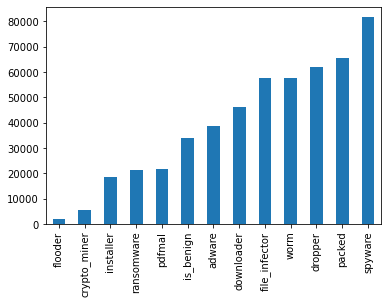

In [128]:
# Looks sane. Some of the sorel binaries represent multiple classes, which explains why there's overlap.
data = df_registry[['is_benign', 'pdfmal', 'spyware', 'adware', 'flooder', 'ransomware', 'dropper', 'packed', 'crypto_miner', 'file_infector', 'installer', 'worm', 'downloader']].sum().sort_values()

display(data)
data.plot(kind='bar')

In [130]:
df_registry.to_csv('/mnt/d/data/dsci591_project/g4_mic_local/preprocessed/images_256x256/registry.csv', index=False)

In [131]:
df_test = pd.read_csv('/mnt/d/data/dsci591_project/g4_mic_local/preprocessed/images_256x256/registry.csv')
df_test